In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [2]:
(train_data, validation_data, test_data), info = tfds.load('cats_vs_dogs', split=['train[:80%]','train[80%:90%]', 'train[90%:]' ],with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete5W26WI/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [3]:
label_names = info.features['label'].names

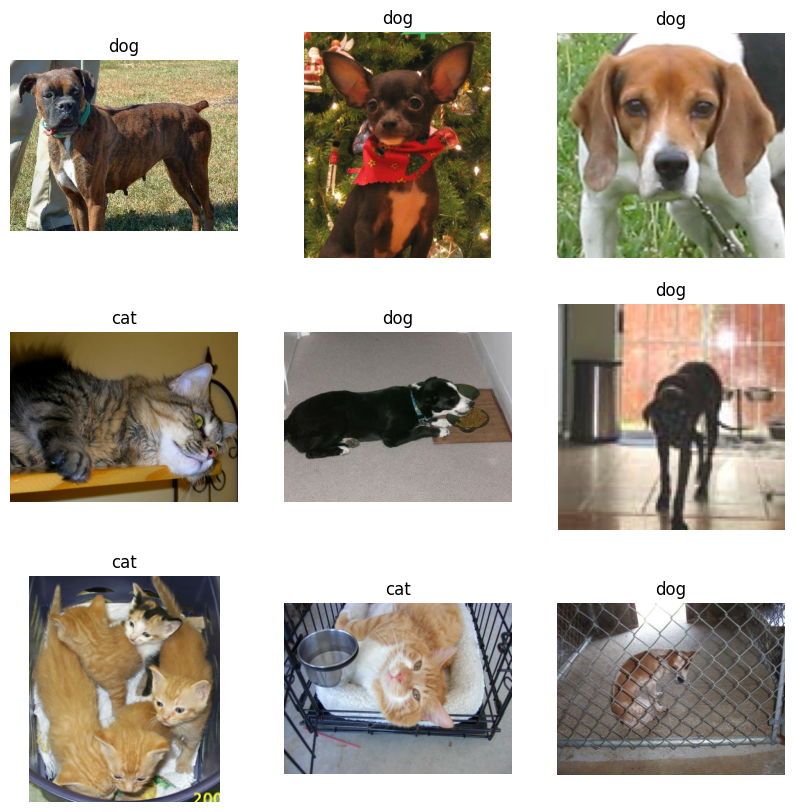

In [4]:
plt.figure(figsize=(10,10))
for i, (image,label) in enumerate(train_data.take(9)):
  ax = plt.subplot(3,3, i+1)
  plt.imshow(image)
  plt.title(label_names[label])
  plt.axis('off')

In [5]:
IMG_SIZE = 150

In [6]:
def formatimage(image, label):
  image = tf.cast(image, tf.float32)/255.0
  image = tf.image.resize(image, (IMG_SIZE,IMG_SIZE))
  return image, label
batch_size = 16
train_data = train_data.map(formatimage).shuffle(1000).batch(batch_size)
validation_data = validation_data.map(formatimage).shuffle(500).batch(batch_size)
test_data = test_data.map(formatimage).batch(batch_size)

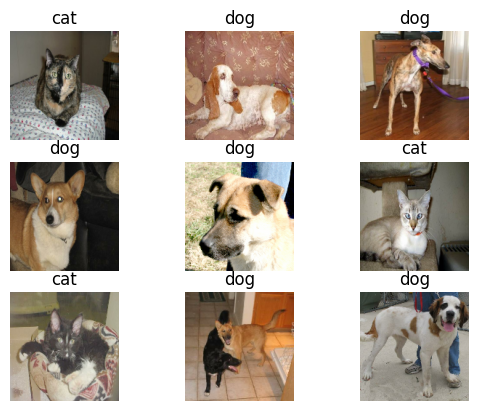

In [7]:
for i, (image, label) in enumerate(train_data.take(9)):  # Select only the first batch
    image = image[i]  # Select the first image from the batch

    ax = plt.subplot(3, 3, i+1)
    plt.imshow(image.numpy())
    plt.title(label_names[label[i].numpy()])
    plt.axis('off')

plt.show()

In [8]:
base_model = tf.keras.applications.MobileNetV2((IMG_SIZE,IMG_SIZE, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [9]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1)

In [10]:
model = tf.keras.Sequential([
                            base_model,
                            global_average_layer,
                            prediction_layer
])

In [11]:
model.compile(tf.keras.optimizers.RMSprop(learning_rate=0.00007),
              loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [14]:
history = model.fit(train_data, epochs=4, validation_data=validation_data)

Epoch 1/4
1164/1164 [==============================] - 428s 365ms/step - loss: 0.0859 - accuracy: 0.9653 - val_loss: 0.0933 - val_accuracy: 0.9647
Epoch 2/4
1164/1164 [==============================] - 457s 391ms/step - loss: 0.0844 - accuracy: 0.9645 - val_loss: 0.0916 - val_accuracy: 0.9660
Epoch 3/4
1164/1164 [==============================] - 457s 391ms/step - loss: 0.0830 - accuracy: 0.9659 - val_loss: 0.0907 - val_accuracy: 0.9652
Epoch 4/4
1164/1164 [==============================] - 455s 390ms/step - loss: 0.0818 - accuracy: 0.9665 - val_loss: 0.0914 - val_accuracy: 0.9665


In [16]:
test_loss, test_accuracy = model.evaluate(test_data)

print("Test Accuracy: ", test_accuracy)

146/146 [==============================] - 47s 319ms/step - loss: 0.0801 - accuracy: 0.9695
Test Accuracy:  0.969475507736206


1/1 [==============================] - 1s 1s/step


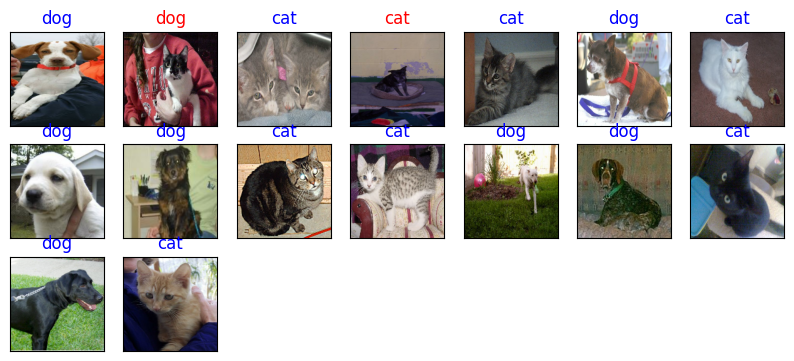

In [19]:
for image , _ in test_data.take(90) :
  pass

pre = model.predict(image)

plt.figure(figsize = (10 , 10))
j = None
for value in enumerate(pre) :
    plt.subplot(7,7,value[0]+1)
    plt.imshow(image[value[0]])
    plt.xticks([])
    plt.yticks([])
    if value[1] > pre.mean() :
        j = 1
        color = 'blue' if j == _[value[0]] else 'red'
        plt.title('dog' , color = color)
    else :
        j = 0
        color = 'blue' if j == _[value[0]] else 'red'
        plt.title('cat' , color = color)

plt.show()